**<font size=5> Module Title: Machine Learning for AI </font>**

**<font size=5> Assessment Title: ML_CA2 </font>**

**<font size=4> Lecturer Name: Dr. David McQuaid </font>**

**<font size=4> Student Name: Chia Hua Lin &emsp; &emsp; ID: 2020044 </font>**

**<font size=3> GitHub Link: https://github.com/Awa25/ML_CA2 </font>**

## Scenario:

This CA consists of 2 parts. Neural Networks and Semantic analysis.

<font size = 4> <b><u> Neural Networks </u></b></font>

You are required to take data stored file “BankRecords.csv”, available on Moodle and process the data into a DataFrame.
You are then required to train a Neural Network to predict the “Income(Thousands’)” of the customers, including tuning the network to achieve the best results.
You must also compare your neural network to a standard ML regressor of your choosing and discuss your findings in the context of the problem at hand.


<font size = 4> <b><u> Semantic Analysis </u></b></font>

You are required to source text data from any social media platform on any topic that you choose and perform semantic analysis on the text. This analysis should provide a visualization of the overall sentiment of your text data , showing the positive, neutral, and negative sentiment expressed. You will require at least 1000 text observations.

<font size = 4> <b><u> Requirements </u></b></font>

- Perform any preparation of the data (for both the Neural Network and Semantic Analysis data) , that you feel is necessary, using python in your Jupyter notebook. Explain your rationale behind your data preparation and how it will assist you. [0-30]
- Create and implement at least 1 Regression algorithm and 1 Neural Network that will output a Prediction of the “Income(Thousands’)” of the customers. Test these models and try to improve it as you see fit discussing your rationale. Discuss your findings and final rational for choosing a particular Regression algorithm. [0-40]
- Make a Prediction of a new customers income, who is not available in the original dataset. [0-5]
- Perform Sentiment analysis on your text data and discuss your findings in detail. [0-20]
- Visualize your sentiment analysis showing the positive, neutral, negative sentiment expressed. [0-5]

# Part 1: Neural Networks

## • Install the necessary libraries

In [1]:
!pip install tensorflow

## • Import necessary libraries

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## • Data Loading and Exploration

<font size = "3"> Predicting Customer Income using Neural Networks </font>

In [4]:
# Load the dataset
df = pd.read_csv('BankRecords.csv')

In [5]:
# Display the first few rows of the dataframe
df.head()

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,1,25,1,49,91107,4,1.6,Diploma,0,No,Yes,No,No,No
1,2,45,19,34,90089,3,1.5,Diploma,0,No,Yes,No,No,No
2,3,39,15,11,94720,1,1.0,Diploma,0,No,No,No,No,No
3,4,35,9,100,94112,1,2.7,Degree,0,No,No,No,No,No
4,5,35,8,45,91330,4,1.0,Degree,0,No,No,No,No,Yes


In [6]:
# Rename the columns for clarity
df.rename(columns = {'Income(Thousands\'s)': 'Income(Thousands)'}, inplace = True)

### • Data Exploration Let's explore the dataset to understand its structure and identify any potential issues.

In [7]:
# Check the basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     5000 non-null   int64  
 1   Age                    5000 non-null   int64  
 2   Experience(Years)      5000 non-null   int64  
 3   Income(Thousands)      5000 non-null   int64  
 4   Sort Code              5000 non-null   int64  
 5   Family                 5000 non-null   int64  
 6   Credit Score           5000 non-null   float64
 7   Education              5000 non-null   object 
 8   Mortgage(Thousands's)  5000 non-null   int64  
 9   Personal Loan          5000 non-null   object 
 10  Securities Account     5000 non-null   object 
 11  CD Account             5000 non-null   object 
 12  Online Banking         5000 non-null   object 
 13  CreditCard             5000 non-null   object 
dtypes: float64(1), int64(7), object(6)
memory usage: 547.0+ 

In [8]:
# Summary statistics of the dataset
df.describe()

,ID,Age,Experience(Years),Income(Thousands),Sort Code,Family,Credit Score,Mortgage(Thousands's)
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,56.498800
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,101.713802
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,101.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,635.000000


In [9]:
# Check for missing values
df.isnull().sum()

ID                       0
Age                      0
Experience(Years)        0
Income(Thousands)        0
Sort Code                0
Family                   0
Credit Score             0
Education                0
Mortgage(Thousands's)    0
Personal Loan            0
Securities Account       0
CD Account               0
Online Banking           0
CreditCard               0
dtype: int64

### • Data Preprocessing We'll handle missing values, encode categorical variables, and normalize the data.

In [10]:
# Convert all column names to strings
df.columns = df.columns.astype(str)

In [11]:
# Define feature columns and target column
feature_columns = df.columns.difference(['Income(Thousands)'])
target_column = 'Income(Thousands)'

In [12]:
# Separate features and target
X = df[feature_columns]
y = df[target_column]

In [13]:
# Preprocess categorical variables
categorical_features = X.select_dtypes(include = ['object']).columns
numerical_features = X.select_dtypes(include = ['int64', 'float64']).columns

In [14]:
# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop = 'first'), categorical_features)
    ])

In [15]:
# Apply the transformations to the feature set
X_processed = preprocessor.fit_transform(X)

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size = 0.2, random_state = 42)

In [17]:
# Standardize scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## • Neural Network Model

In [133]:
# Import necessary libraries
from tensorflow.keras.layers import Dropout
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

In [64]:
# Build the neural network with dropout regularization
model = Sequential()
model.add(Dense(64, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [65]:
# Compile the model
#model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['mae'])
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [66]:
# Train the model - 100 epochs and validation_step at 0.2
history = model.fit(
    X_train, 
    y_train, 
    epochs = 100, 
    batch_size = 32, 
    validation_split = 0.2, 
    verbose = 1)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7563.8506 - val_loss: 4060.0447
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2980.1465 - val_loss: 1409.3988
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1570.7065 - val_loss: 1296.5137
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1531.0259 - val_loss: 1236.1302
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1456.0835 - val_loss: 1200.6603
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1406.7491 - val_loss: 1166.1143
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1387.9548 - val_loss: 1179.3080
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1325.7327 - val_loss: 1107.5249
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1262.4476 - val_loss: 1092.5780
Epoch 10/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1265.2749 - val_loss: 1085.0381
Epoch 11/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1231.87

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1127.1797 - val_loss: 811.8597
Epoch 66/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1112.3073 - val_loss: 801.3694
Epoch 67/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1057.3981 - val_loss: 789.0592
Epoch 68/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1021.6474 - val_loss: 803.3410
Epoch 69/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1083.3478 - val_loss: 815.7856
Epoch 70/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1068.8285 - val_loss: 830.6964
Epoch 71/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1029.8207 - val_loss: 784.2375
Epoch 72/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1049.5229 - val_loss: 771.0174
Epoch 73/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1045.4478 - val_loss: 766.2965
Epoch 74/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1038.3949 - val_loss: 771.3679
Epoch 75/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1032.7524 - val_loss:

In [67]:
# Evaluate the model
#loss, mae = model.evaluate(X_test, y_test)
#loss = model.evaluate(X_test, y_test)
loss = model.evaluate(X_test_scaled, y_test)

# Calculate Mean Squared Error
#mse = loss 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4330.3628  


In [68]:
print(f"Test Loss: {loss}")

#print("Mean Absolute Error on Test Set:", mae)
#print("Mean Squared Error on Test Set:", mse)

Test Loss: 4455.22509765625


In [69]:
# Predict the values on test data and check the accuracy of the model
#nn_predictions = model.predict(X_test)
#nn_mse = mean_squared_error(y_test, nn_predictions)

nn_predictions = model.predict(X_test_scaled)
nn_mse = mean_squared_error(y_test, nn_predictions)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [70]:
print(f'Neural Network MSE: {nn_mse}')

Neural Network MSE: 4455.225733618828


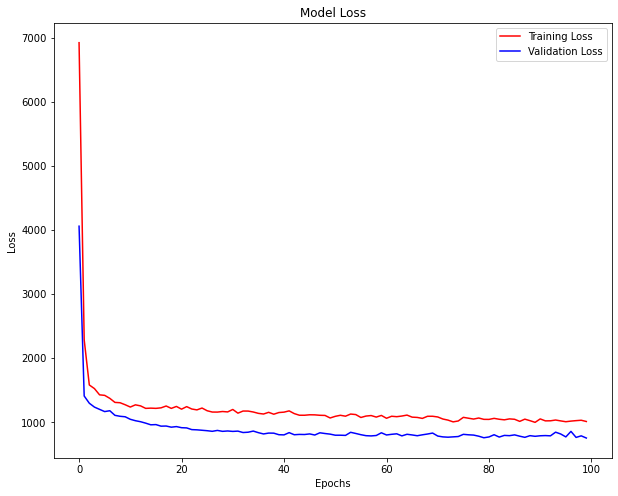

In [71]:
# Plot training history
plt.figure(figsize = (10, 8))

plt.plot(history.history['loss'], label = 'Training Loss', color = 'red')
plt.plot(history.history['val_loss'], label = 'Validation Loss', color = 'blue')

plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

### • Fine tunning Model

In [134]:
# Define a custom learning rate
learning_rate = 0.001

In [74]:
# Build the neural network
model = Sequential()
model.add(Dense(64, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [75]:
# Compile the model with a custom learning rate
optimizer = Adam(learning_rate = learning_rate)
model.compile(optimizer = optimizer, loss = 'mean_squared_error')

In [76]:
# Train the model
history = model.fit(X_train, y_train, 
                    epochs = 100, 
                    batch_size = 32, 
                    validation_split = 0.2, 
                    verbose = 1)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7097.7129 - val_loss: 2415.1179
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2189.0962 - val_loss: 1541.8417
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1559.6920 - val_loss: 1404.0754
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1471.1746 - val_loss: 1327.0715
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1470.9417 - val_loss: 1272.1029
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1367.6188 - val_loss: 1238.8042
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1355.5845 - val_loss: 1232.1572
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1353.2280 - val_loss: 1180.2299
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1276.4362 - val_loss: 1144.3851
Epoch 10/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1336.5100 - val_loss: 1134.8508
Epoch 11/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1318.36

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1011.7818 - val_loss: 792.9302
Epoch 66/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1032.8285 - val_loss: 765.0458
Epoch 67/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1099.2433 - val_loss: 766.1066
Epoch 68/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1027.5251 - val_loss: 763.7640
Epoch 69/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 980.1227 - val_loss: 763.9840
Epoch 70/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1037.9702 - val_loss: 772.4152
Epoch 71/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 974.2376 - val_loss: 764.0453
Epoch 72/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 940.8611 - val_loss: 759.1970
Epoch 73/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 941.7338 - val_loss: 805.9066
Epoch 74/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1073.1776 - val_loss: 755.6546
Epoch 75/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1024.7947 - val_loss: 768

In [77]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 881.3287   


In [78]:
print(f"Test Loss with Custom Learning Rate: {loss}")

Test Loss with Custom Learning Rate: 797.36767578125


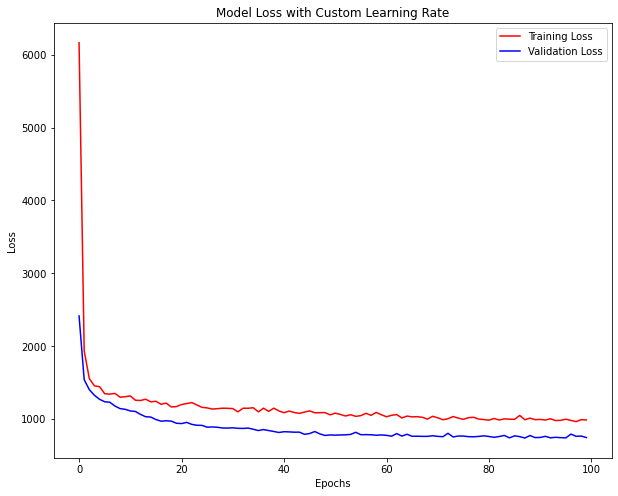

In [79]:
# Plot training history
plt.figure(figsize = (10, 8))

plt.plot(history.history['loss'], label = 'Training Loss', color = 'red')
plt.plot(history.history['val_loss'], label = 'Validation Loss', color = 'blue')

plt.title('Model Loss with Custom Learning Rate')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

### • Fine Tune more

In [135]:
# Import necessary libraries
from tensorflow.keras.regularizers import l2

In [137]:
# Build the neural network with L2 regularization
model = Sequential()
model.add(Dense(64, input_dim = X_train.shape[1], activation = 'relu', kernel_regularizer = l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(32, activation = 'relu', kernel_regularizer = l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(16, activation = 'relu', kernel_regularizer = l2(0.01)))
model.add(Dense(1, activation = 'linear', kernel_regularizer = l2(0.01)))

In [81]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [82]:
# Train the model
history = model.fit(X_train, y_train, 
                    epochs = 100, 
                    batch_size = 32, 
                    validation_split = 0.2, 
                    verbose = 1)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 7362.7856 - val_loss: 3482.9341
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2643.4978 - val_loss: 1394.9363
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1655.0214 - val_loss: 1264.7169
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1597.8817 - val_loss: 1218.4088
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1528.3364 - val_loss: 1172.9867
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1402.0560 - val_loss: 1120.9463
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1386.6639 - val_loss: 1138.7156
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1372.3547 - val_loss: 1124.9498
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1297.6803 - val_loss: 1111.1604
Epoch 10/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1319.6172 - val_loss: 1080.7385
Epoch 11/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1310.75

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1033.8175 - val_loss: 770.1071
Epoch 66/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1033.1437 - val_loss: 781.7081
Epoch 67/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1065.7097 - val_loss: 780.8237
Epoch 68/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1035.8156 - val_loss: 789.7816
Epoch 69/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1057.2937 - val_loss: 768.8837
Epoch 70/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1054.8829 - val_loss: 765.0405
Epoch 71/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1006.8599 - val_loss: 766.9280
Epoch 72/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1062.9010 - val_loss: 779.3949
Epoch 73/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1043.5435 - val_loss: 767.0848
Epoch 74/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1066.7551 - val_loss: 771.8155
Epoch 75/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1009.3794 - val_loss:

In [83]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 889.9433  


In [84]:
print(f"Test Loss with L2 Regularization: {loss}")

Test Loss with L2 Regularization: 804.6155395507812


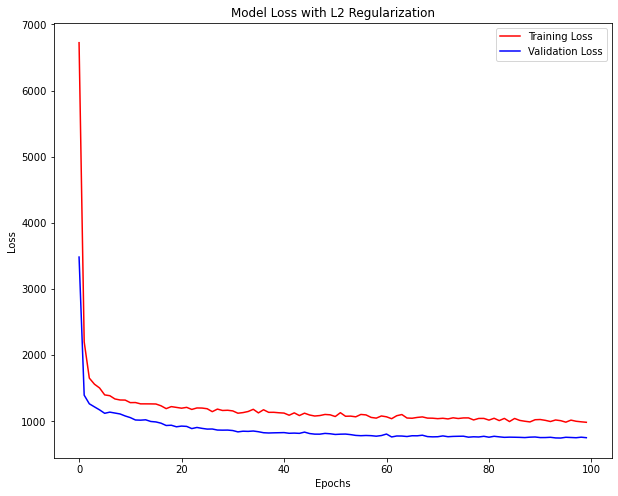

In [85]:
# Plot training history
plt.figure(figsize = (10, 8))

plt.plot(history.history['loss'], label = 'Training Loss', color = 'red')
plt.plot(history.history['val_loss'], label = 'Validation Loss', color = 'blue')

plt.title('Model Loss with L2 Regularization')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

## • Random Forest Regressor

In [86]:
# Separate features and target
X = df.drop(columns = ['Income(Thousands)'])
y = df['Income(Thousands)']

In [87]:
# Preprocess categorical variables
categorical_features = X.select_dtypes(include = ['object']).columns
numerical_features = X.select_dtypes(include = ['int64', 'float64']).columns

In [88]:
# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop = 'first'), categorical_features)
    ])

In [89]:
# Apply the transformations to the feature set
X_processed = preprocessor.fit_transform(X)

In [90]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size = 0.2, random_state = 42)

In [138]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor

In [93]:
# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [94]:
# Predict and evaluate the model
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f"Random Forest Regressor Test MSE: {rf_mse}")

Random Forest Regressor Test MSE: 436.6706159


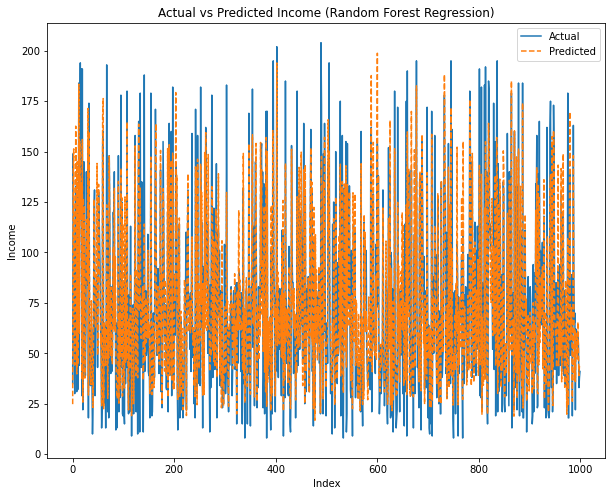

In [95]:
# Plot actual vs predicted values for Random Forest Regression
plt.figure(figsize = (10, 8))

plt.plot(y_test.values, label='Actual')
plt.plot(rf_predictions, label='Predicted', linestyle='--')

plt.title('Actual vs Predicted Income (Random Forest Regression)')
plt.xlabel('Index')
plt.ylabel('Income')

plt.legend()
plt.show()

## • Comparing of both Models

In [96]:
# Evaluate the neural network model
#nn_loss = model.evaluate(X_test, y_test)
#print(f"Neural Network Test MSE: {nn_loss}")

print(f'\n• Neural Network Test MSE: {nn_mse}\n')

# Random Forest Regressor Results
print(f"• Random Forest Regressor Test MSE: {rf_mse}")


• Neural Network Test MSE: 4455.225733618828

• Random Forest Regressor Test MSE: 436.6706159


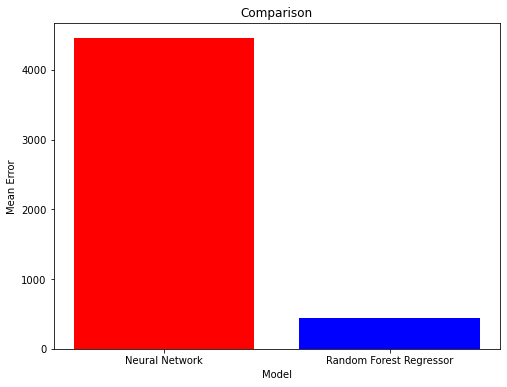

In [97]:
# Plot comparing
plt.figure(figsize = (8, 6))
plt.bar(['Neural Network', 'Random Forest Regressor'], 
        [nn_mse, rf_mse], 
        color = ['red', 'blue'])

plt.title('Comparison')
plt.xlabel('Model')
plt.ylabel('Mean Error')
plt.show()

## • Make a Prediction of a new customers income, who is not available in the original dataset

In [98]:
# Set the random seed to ensure reproducibility
np.random.seed(42)

In [99]:
# Generate the number of rows for the dataset
num_rows = 2000

In [100]:
# Generate random data using numpy
data = {
    "ID": np.arange(1, num_rows + 1),
    "Experience(Years)": np.random.randint(1, 42, size = num_rows),
    "Income(Thousands)": np.random.randint(45000, 60001, size = num_rows),
    "Sort Code": np.random.randint(90000, 95001, size = num_rows),
    "Education": np.random.choice(["Diploma", "Degree", "Masters"], size = num_rows),
    "Mortgage_Thousands": np.random.randint(0, 156, size = num_rows),
    "Personal Loan": np.random.choice(["Yes", "No"], size = num_rows),
}

In [101]:
# Creat DataFrame
df = pd.DataFrame(data)

In [102]:
# Convert the Education and Personal Loan columns to numerical values
df['Education'] = df['Education'].map({'Diploma': 1, 'Degree': 2, 'Masters': 3})
df['Personal Loan'] = df['Personal Loan'].map({'No': 0, 'Yes': 1})

In [103]:
# Separate features and labels
X = df.drop(columns = ['ID', 'Income(Thousands)'])
y = df['Income(Thousands)'] / 1000  # Convert income to thousands

In [104]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [105]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [107]:
# Build a neural network model
model = Sequential()
model.add(Dense(64, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1))  # Output layer

In [108]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'mse')

In [109]:
# Train the model
model.fit(X_train, y_train, epochs = 100, batch_size = 10, validation_split = 0.2)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2435.0342 - val_loss: 100.8982
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 62.2113 - val_loss: 56.3604
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 45.7545 - val_loss: 47.1181
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 39.3995 - val_loss: 43.3412
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36.4320 - val_loss: 38.1509
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30.1975 - val_loss: 33.8914
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29.7949 - val_loss: 30.7069
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26.8655 - val_loss: 30.5502
Epoch 9/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25.3036 - val_loss: 27.0770
Epoch 10/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.2438 - val_loss: 27.1481
Epoch 11/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.4447 - val_loss: 25.8527
Epoch 12/100
128

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.9856 - val_loss: 21.9084
Epoch 68/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.4006 - val_loss: 21.2871
Epoch 69/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.4185 - val_loss: 20.8327
Epoch 70/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.3495 - val_loss: 20.6462
Epoch 71/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.3923 - val_loss: 22.1429
Epoch 72/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.3470 - val_loss: 20.3770
Epoch 73/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.9517 - val_loss: 19.9117
Epoch 74/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.1683 - val_loss: 21.1965
Epoch 75/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.6596 - val_loss: 20.2451
Epoch 76/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.5794 - val_loss: 22.0400
Epoch 77/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.9923 - val_loss: 20.4182
Epoch 78/100
128/128 ━━

In [110]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Model Loss: {loss}')

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.4024  
Model Loss: 18.60079574584961


In [111]:
# Predict income for new customers
# New customer data should have the same number and order of features as the training data
new_customers = np.array([
    [28, 92000, 2, 50, 1],  # Example of new customer 1
    [50, 91000, 3, 100, 0]  # Example of new customer 2
])  # Example new customer data

In [112]:
# Standardize new data
new_customers = scaler.transform(new_customers)  
predictions = model.predict(new_customers)
print(f'Predicted Income (in thousands): {predictions.flatten()}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predicted Income (in thousands): [51.592155 53.404755]


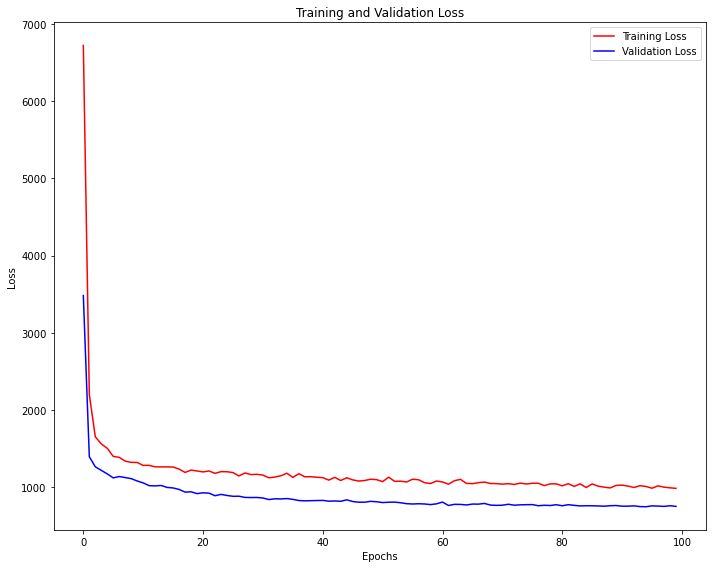

In [113]:
# Plot predictions
plt.figure(figsize=(10, 8))

plt.plot(history.history['loss'], label = 'Training Loss', color = 'red')
plt.plot(history.history['val_loss'], label = 'Validation Loss', color = 'blue')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Part 2: Semantic Analysis

<font size = "3"> The data was downloaded from Kaggle: https://www.kaggle.com/datasets/yasserh/twitter-tweets-sentiment-dataset
    

I used the TextBlob library to perform sentiment analysis on the collected posts. Each post's sentiment is classified as positive, neutral, or negative based on its polarity score. </font>

## • Install the necessary libraries

In [114]:
!pip install textblob

## • Import necessary libraries

In [149]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
from textblob import TextBlob
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [150]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /Users/awa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/awa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/awa/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [151]:
# Load the CSV file into a DataFrame
df = pd.read_csv('Tweets.csv')

In [152]:
# Display the first few rows of the DataFrame
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [153]:
# Check the basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [154]:
# df.drop(df.index[2000:27481], inplace = True)

In [155]:
# Ensure all text data is in string format
#df['text'] = df['text'].astype(str)

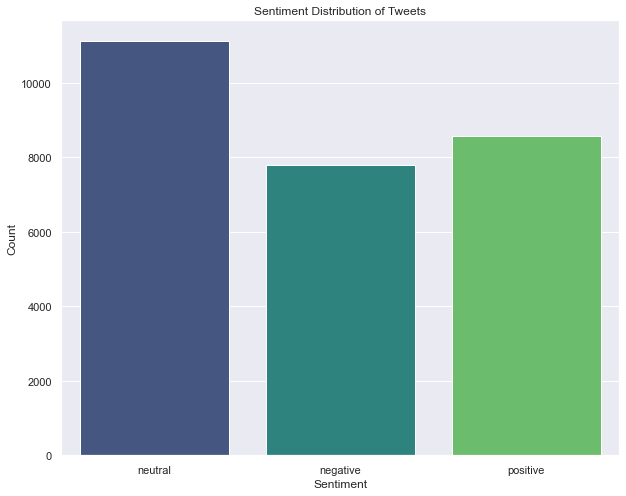

In [156]:
# Set the style
sns.set(style = "darkgrid")

# Plot the sentiment distribution
plt.figure(figsize = (10, 8))
sns.countplot(x = 'sentiment', data = df, palette = 'viridis')
plt.title('Sentiment Distribution of Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

### •  Preprocess the Data Preprocessing involves cleaning the text data to make it suitable for analysis. This includes converting text to lowercase, removing punctuation, and tokenizing.

In [157]:
# Function to preprocess text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = word_tokenize(text)  # Tokenize text
    text = [word for word in text if word not in stopwords.words('english')]  # Remove stopwords
    return text

In [158]:
# Apply preprocessing to the 'text' column
df['cleaned_text'] = df['text'].apply(lambda x: preprocess_text(str(x)))

In [159]:
# Display the first few rows of the DataFrame with cleaned text
df.head()

,textID,text,selected_text,sentiment,cleaned_text
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,"[id, responded, going]"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,"[sooo, sad, miss, san, diego]"
2,088c60f138,my boss is bullying me...,bullying me,negative,"[boss, bullying]"
3,9642c003ef,what interview! leave me alone,leave me alone,negative,"[interview, leave, alone]"
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,"[sons, couldnt, put, releases, already, bought]"


### • Perform Sentiment Analysis We will use the TextBlob library for sentiment analysis.

In [160]:
# Function to get sentiment polarity
def get_sentiment(text):
    return TextBlob(" ".join(text)).sentiment.polarity

In [161]:
# Apply sentiment analysis to the cleaned text
df['sentiment_score'] = df['cleaned_text'].apply(lambda x: get_sentiment(x))

In [162]:
# Classify the sentiment based on the polarity score
df['sentiment'] = df['sentiment_score'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

In [163]:
# Display the first few rows of the DataFrame with sentiment scores
df.head()

,textID,text,selected_text,sentiment,cleaned_text,sentiment_score
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,"[id, responded, going]",0.0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,"[sooo, sad, miss, san, diego]",-0.5
2,088c60f138,my boss is bullying me...,bullying me,neutral,"[boss, bullying]",0.0
3,9642c003ef,what interview! leave me alone,leave me alone,neutral,"[interview, leave, alone]",0.0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",neutral,"[sons, couldnt, put, releases, already, bought]",0.0


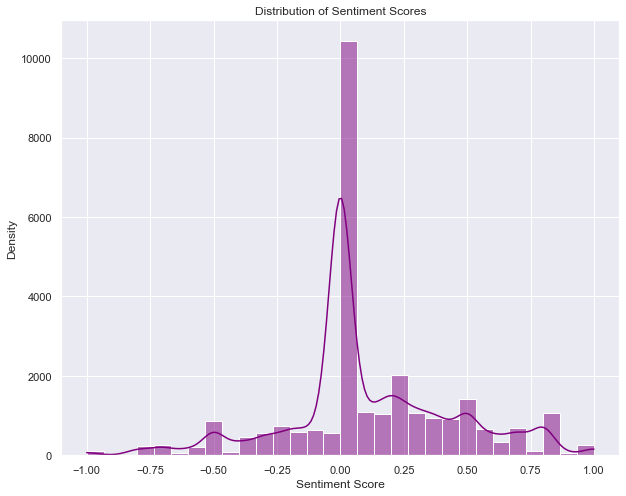

In [164]:
# Plot the sentiment scores
plt.figure(figsize = (10, 8))

sns.histplot(df['sentiment_score'], bins = 30, kde = True, color = 'purple')
plt.title('Distribution of Sentiment Scores')

plt.xlabel('Sentiment Score')
plt.ylabel('Density')

plt.show()

### • Perform Topic Modeling We will use the gensim library for topic modeling.

In [165]:
!pip install gensim

In [166]:
# Import necessary libraries
import gensim
from gensim import corpora

In [167]:
# Create a dictionary and corpus for topic modeling
texts = df['cleaned_text']
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [168]:
# Build LDA model
lda_model = gensim.models.LdaModel(corpus, num_topics = 5, id2word = dictionary, passes = 15)

In [169]:
# Display the topics
topics = lda_model.print_topics(num_words = 4)
for topic in topics:
    print(topic)

(0, '0.028*"im" + 0.021*"work" + 0.020*"going" + 0.017*"go"')
(1, '0.014*"sorry" + 0.014*"sad" + 0.013*"hey" + 0.012*"im"')
(2, '0.008*"yes" + 0.006*"one" + 0.005*"birthday" + 0.005*"star"')
(3, '0.026*"day" + 0.016*"happy" + 0.015*"u" + 0.013*"lol"')
(4, '0.025*"like" + 0.014*"good" + 0.011*"feel" + 0.010*"im"')


In [170]:
# Topic Modeling
texts = df['cleaned_text']
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

lda_model = gensim.models.LdaModel(corpus, num_topics = 5, id2word = dictionary, passes = 15)

In [171]:
# Extract the topics and the top words
topics = lda_model.show_topics(formatted = False)

In [172]:
# Create a DataFrame for topics
topic_data = []
for i, topic in topics:
    for word, weight in topic:
        topic_data.append((i, word, weight))
topic_df = pd.DataFrame(topic_data, columns = ['Topic', 'Word', 'Weight'])

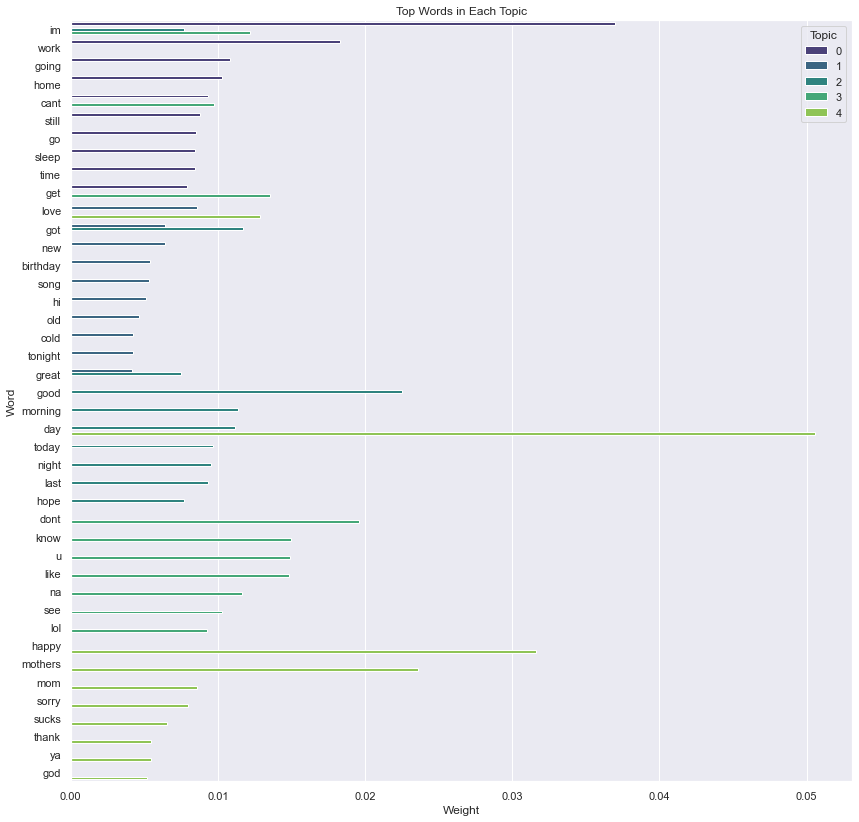

In [173]:
# Plot the top words in each topic
plt.figure(figsize = (14, 14))

sns.barplot(x = 'Weight', y = 'Word', hue = 'Topic', data = topic_df, palette = 'viridis')
plt.title('Top Words in Each Topic')

plt.xlabel('Weight')
plt.ylabel('Word')

plt.show()